# Car price prediction

step 1:- Import required libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

step 2 :- Load and inspect the dataset

In [8]:
df = pd.read_csv("/content/car data.csv")
print(df.head())
print("\nDataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nUnique Car Names:", df['Car_Name'].nunique())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

step 3 :- Data visualization

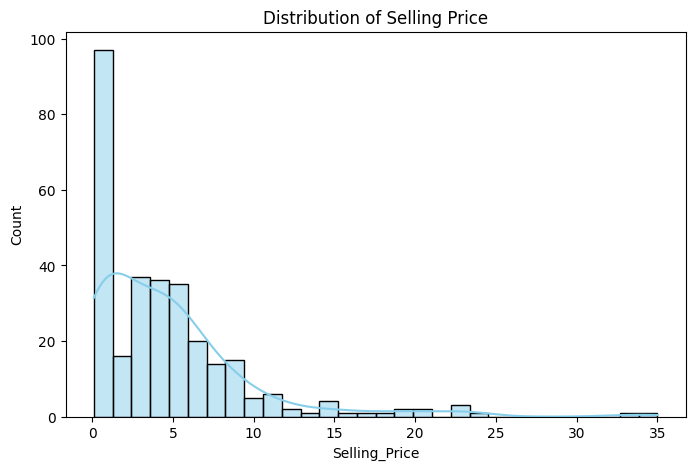

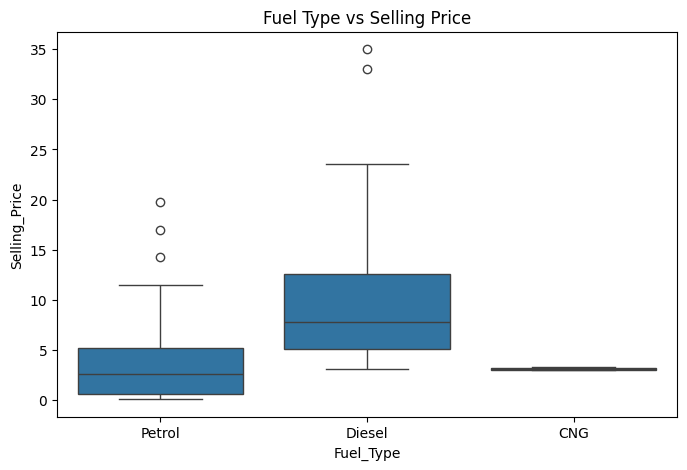

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Fuel Type vs Selling Price")
plt.show()

step 4 :- Feature Engineering


In [11]:
df['Car_Age'] = 2025 - df['Year']  # Assuming current year = 2025
df.drop('Year', axis=1, inplace=True)

# Drop Car_Name because it’s not very informative
df.drop('Car_Name', axis=1, inplace=True)

print("\nUpdated Columns:", df.columns)


Updated Columns: Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Car_Age'],
      dtype='object')


step 5:- Define Features (X) and Target (y)

In [12]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


step 6 :- Encode categorical variables

In [13]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

X = ct.fit_transform(X)

step 7:- Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

step 8:- Train multiple models

In [15]:
# 🔹 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 🔹 Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


step 9:- Evaluate models

In [16]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Model: Linear Regression
MAE : 1.2163740193328816
RMSE: 1.8658375680939476
R²  : 0.8488707839193623

Model: Random Forest
MAE : 0.6418672131147544
RMSE: 0.9663136918121392
R²  : 0.9594643604480222


 step 10 :- Feature Importance (Random Forest)

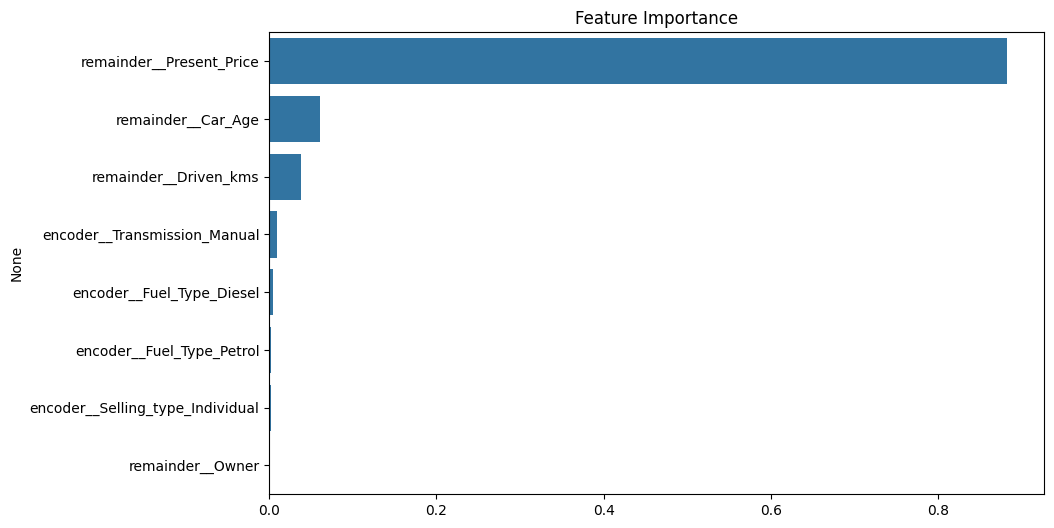

In [17]:
importances = rf.feature_importances_
feature_names = ct.get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance")
plt.show()

step 11:- Predicting for a new car

In [18]:
new_car = pd.DataFrame({
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Present_Price': [6.5],
    'Driven_kms': [35000],
    'Owner': [0],
    'Car_Age': [7]
})

new_car_encoded = ct.transform(new_car)
predicted_price = rf.predict(new_car_encoded)
print(f"\nPredicted Selling Price for new car: ₹{predicted_price[0]:.2f} lakhs")


Predicted Selling Price for new car: ₹4.55 lakhs
